In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
from tensorflow.keras import utils

In [4]:
#!pip install keras

In [5]:
PATHDATA_MFFC_AVG = '../../../data/mfccs_cvs/audios_MFCC_average_15000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [6]:
FOLDS = 10
TRAIN_SIZE = 0.8

In [7]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y = np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (161602, 20)




In [8]:
def splitDataSet(X,Y,groups,tracks,test_size):              
        gss = GroupShuffleSplit(n_splits=1, test_size=test_size, random_state=0)
        gss.get_n_splits()
        returns = []
        for train_index, test_index in gss.split(X, Y, groups=groups):
            X_train_original, X_test_original = X[train_index], X[test_index]
            #print(X_train, X_test)
            Y_train__original, Y_test_original = Y[train_index], Y[test_index]
            #print(y_train, y_test)
            groups_original = groups[train_index]
            groups_test_original=groups[test_index]
            tracks_train_original = tracks[train_index]
            tracks_test_original = tracks[test_index]              
            returns.append(X_train_original)
            returns.append(Y_train__original)
            returns.append(X_test_original)
            returns.append(Y_test_original)
            returns.append(tracks_train_original)
            returns.append(tracks_test_original)
            returns.append(groups_original)
            returns.append(groups_test_original)    
              
        return returns

In [9]:
data_train = splitDataSet(X=X,Y=Y,groups=groups,tracks=tracks,test_size=1-TRAIN_SIZE)

In [10]:
X_train_original = data_train[0]
Y_train__original=data_train[1]
X_test_original=data_train[2]
Y_test_original=data_train[3]
tracks_train_original=data_train[4]
tracks_test_original=data_train[5]
groups_original=data_train[6]
groups_test_original=data_train[7]

In [11]:
X_train_original.shape

(127740, 20)

In [12]:
Y_test_original.shape

(33862, 1)

In [13]:
y_trainOHE = utils.to_categorical(Y_train__original)

In [14]:
y_trainOHE

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [15]:
y_trainOHE.shape

(127740, 5)

In [16]:
input_dim = X_train_original.shape[1]

In [17]:
input_dim

20

In [18]:
nb_classes = y_trainOHE.shape[1]
nb_classes

5

## Define the network architecture using keras

In [19]:
model = Sequential()
model.add(Dense(34, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(34))
model.add(Activation('relu'))
model.add(Dense(34))
model.add(Activation('relu'))
model.add(Dense(nb_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 34)                714       
_________________________________________________________________
activation (Activation)      (None, 34)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 34)                1190      
_________________________________________________________________
activation_1 (Activation)    (None, 34)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 34)                1190      
_________________________________________________________________
activation_2 (Activation)    (None, 34)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

# loss function and optimizer

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training

In [23]:
print("Training...")
history = model.fit(X_train_original, y_trainOHE, epochs=50, batch_size=128, validation_split=0.1, verbose=2)

Training...
Train on 114966 samples, validate on 12774 samples
Epoch 1/50
114966/114966 - 3s - loss: 2.0598 - acc: 0.3218 - val_loss: 2.7517 - val_acc: 0.0320
Epoch 2/50
114966/114966 - 2s - loss: 1.4485 - acc: 0.3648 - val_loss: 1.4759 - val_acc: 0.3197
Epoch 3/50
114966/114966 - 2s - loss: 1.4098 - acc: 0.3787 - val_loss: 2.0261 - val_acc: 0.1191
Epoch 4/50
114966/114966 - 2s - loss: 1.3906 - acc: 0.3883 - val_loss: 1.8979 - val_acc: 0.1550
Epoch 5/50
114966/114966 - 3s - loss: 1.3770 - acc: 0.3942 - val_loss: 1.9314 - val_acc: 0.1534
Epoch 6/50
114966/114966 - 2s - loss: 1.3664 - acc: 0.3986 - val_loss: 2.3997 - val_acc: 0.0669
Epoch 7/50
114966/114966 - 2s - loss: 1.3546 - acc: 0.4030 - val_loss: 1.9205 - val_acc: 0.1231
Epoch 8/50
114966/114966 - 3s - loss: 1.3486 - acc: 0.4059 - val_loss: 1.8917 - val_acc: 0.1422
Epoch 9/50
114966/114966 - 4s - loss: 1.3402 - acc: 0.4093 - val_loss: 1.9125 - val_acc: 0.1623
Epoch 10/50
114966/114966 - 3s - loss: 1.3363 - acc: 0.4114 - val_loss: 2

## Predict

In [25]:
def modelPredict(model,Xtest,tracks_test):
        Yest = model.predict(Xtest)  # probabilidades (Xtest.shape, n_clases)   
        #Creamos un matriz con la primera fila las predicciones y la otra el track 
        Yest = np.argmax(Yest, axis=1) # sacamos el index de la mayor porbabilidad 
        
        X_test_with_id_trak = np.column_stack((Yest,tracks_test))

        #Agrupamos por audio
        prediction_by_instances = npi.group_by(X_test_with_id_trak[:, -1]).split(X_test_with_id_trak[:, -2])

        #Sacamos la moda de prediccion
        predictions = []

        for v in range(len(prediction_by_instances)):
            decision = stats.mode(prediction_by_instances[v])[0]
            predictions.append(decision)
    
        return np.array(predictions) 

In [26]:
def createGroups(Y,tracks):
        Y_train_tracks = np.column_stack((Y,tracks))
        groups_by_tracks = npi.group_by(Y_train_tracks[:, -1]).split(Y_train_tracks[:, -2])
        modas = []

        for v in range(len(groups_by_tracks)):
            moda = stats.mode(groups_by_tracks[v])[0]
            modas.append(moda)
        return np.array(modas)

In [27]:
print("Generating test predictions...")
preds = modelPredict(model,X_test_original,tracks_test_original)

Generating test predictions...


In [28]:
preds.shape

(3145, 1)

In [29]:
Y_real = createGroups(Y_test_original,tracks_test_original)

In [30]:
Y_real.shape

(3145, 1)

In [31]:
Accuracy = np.mean(preds == Y_real)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  45.62798092209857 %


In [32]:
objects = ('yes','no','right','five','nine')

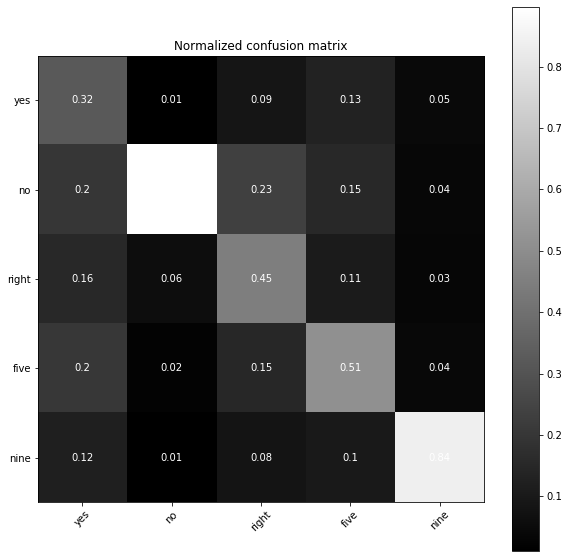

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_real, preds)
cm = cm/np.sum(cm,axis=0)
cmap = plt.cm.gray
tick_marks = np.arange(nb_classes)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, objects, rotation=45)
plt.yticks(tick_marks, objects);

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


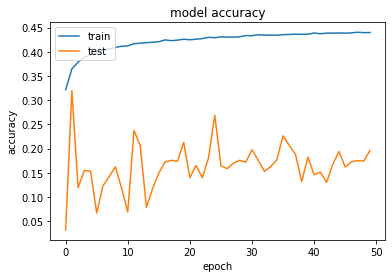

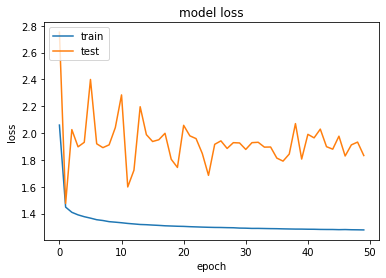

In [24]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()